
##### Diabete Feature Engineering

Problem : Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını gerçekleştirmeniz beklenmektedir.

- Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır.
- ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları
- üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 768 gözlem ve 8 sayısal bağımsız değişkenden oluşmaktadır.
- Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

- Pregnancies: Hamilelik sayısı
- Glucose: Glikoz
- BloodPressure: Kan basıncı (Diastolic(Küçük Tansiyon))
- SkinThickness: Cilt Kalınlığı
- Insulin: İnsülin.
- BMI: Beden kitle indeksi.
- DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
- Age: Yaş (yıl)
- Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)

#### Exploratory Data Analysis

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
# from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

In [170]:
df = pd.read_csv("C:\\MachineLearningProjects\\datas\\diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [171]:

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum()) #eksik deger var mı? varsa kac tane?
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T) # sayısal değişkenlerin ceyrekliklerinin incelenmesi
    
    
check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [173]:
# Glucose degeri sıfır olabilir mi?
# Insulin degeri sıfır olabilir mi ?
# Kan basıncı sıfır olabilir mi?
# Veri setinde eksik degereler vardı da sıfır basıldı?
# Insulin degerinde 95 ceyreklikten max degere buyuk bir sıcrayıs var bu da aykırı deger olabileceginin bir sinyali.

NUMERİK VE KATEGORİK DEĞİŞKENLERİN YAKALANMASI

In [174]:

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"] # 0,1,2
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"] # name
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car] # cat_cols tüm object  veri tipini tuttugu için içerisinde cat_but_car bulunabilir.

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat] #numerik_gorunumlu kategorikler hariç

    print(f"Observations: {dataframe.shape[0]}") # satır
    print(f"Variables: {dataframe.shape[1]}") # sutun
    print(f'cat_cols: {len(cat_cols)}') # categorik degişken sayısı
    print(f'num_cols: {len(num_cols)}') # numerik değişkenler
    print(f'cat_but_car: {len(cat_but_car)}') # categorik fakat kardinal
    print(f'num_but_cat: {len(num_but_cat)}') # numerik görünümlü kategorik

    return cat_cols, num_cols, cat_but_car


cat_cols, num_but_cat, cat_but_car Tanımlamaları:

+ cat_cols: Kategorik değişkenleri tutacak bir liste oluşturuluyor. Bunun için veri çerçevesindeki her bir sütunun veri tipi "object" (karakter dizisi) mi diye kontrol ediliyor. Eğer öyleyse, o sütun kategorik bir değişken olarak kabul ediliyor ve cat_cols listesine ekleniyor.


+ num_but_cat: Kategorik görünümlü, ancak aslında sayısal olan değişkenleri tutacak bir liste oluşturuluyor. Burada, kategorik gibi görünen ancak eşik değeri (cat_th) altında farklı değerler alabilen sütunlar num_but_cat listesine ekleniyor.

+ cat_but_car: Kategorik fakat kardinal olan değişkenleri tutacak bir liste oluşturuluyor. Bu sütunlar, eşik değeri (car_th) üzerinde farklı değerler alabilen ve kategorik olarak kabul edilen sütunlar cat_but_car listesine ekleniyor.

+ cat_cols'in Temizlenmesi: cat_cols içindeki kategorik değişkenlerin içerisinde, kategorik fakat kardinal olanlar da olabilir. Bu durumda, onlar da cat_cols listesine eklenir. Ancak, cat_but_car içinde de bulunabilirler. Bu nedenle, cat_cols içindeki bu tür değişkenler cat_but_car listesindeyse, onlar cat_cols listesinden çıkarılır.

+ num_cols Tanımlaması: 
  num_cols: Sayısal değişkenleri tutacak bir liste oluşturuluyor. Bunun için veri çerçevesindeki her bir sütunun veri tipi "object" (karakter dizisi) değilse, yani sayısal bir değer içeriyorsa, o sütun num_cols listesine ekleniyor.
  
Bilgilendirme ve Listelerin Döndürülmesi:

Fonksiyon, veri çerçevesinin boyutunu (dataframe.shape[0] ve dataframe.shape[1]) ve bulunan değişken türlerinin sayılarını (cat_cols, num_cols, cat_but_car, num_but_cat) ekrana yazdırır.
Son olarak, cat_cols, num_cols ve cat_but_car listelerini döndürür.
Bu şekilde, fonksiyon verilen bir veri çerçevesindeki değişkenlerin türlerini ve özelliklerini belirler ve bu bilgileri döndürür. Bu bilgiler daha sonra veri setinin analizi veya modelleme süreçlerinde kullanılabilir.

In [175]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


KATEGORİK DEĞİŞKENLERİN ANALİZİ

In [176]:

# amacım değişkene dair degerlerin oranına göz atmak.
def cat_summary(dataframe, col_name, plot=True): # plot:true olursa if çalışır.
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),  #değişkende hangi degerden kacar adet var?
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)})) # deger adetlerini toplam deger sayısına bölümü oran verir.
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


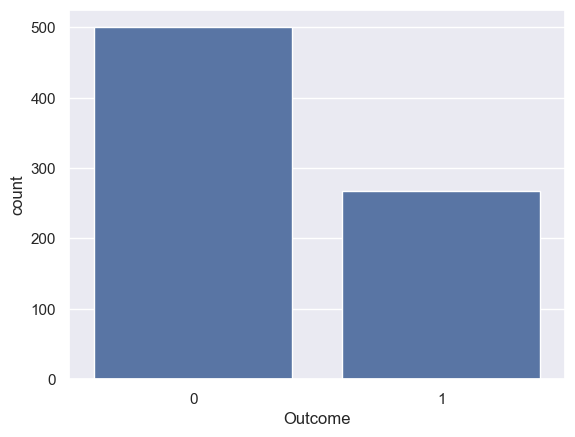

In [177]:
# kategorik değişkenimde deniyorum.
cat_summary(df, "Outcome")

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


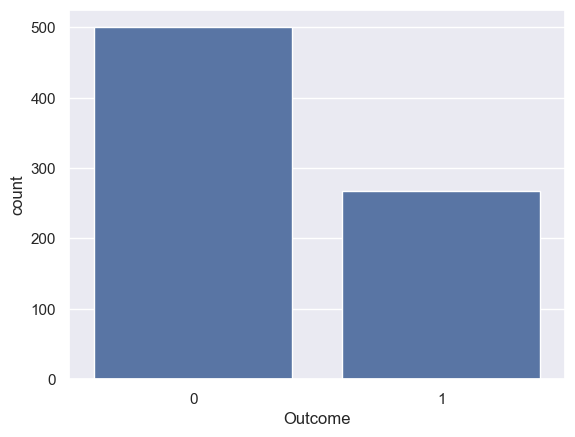

In [178]:
for col in cat_cols:
    cat_summary(df, col)

##### NUMERİK DEĞİŞKENLERİN ANALİZİ

In [179]:
def num_summary(dataframe, numerical_col, plot=False):  # plot:true olursa if çalışır.
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99] # hangi ceyreklikleri istiyorum?
    print(dataframe[numerical_col].describe(quantiles).T) # istedigim ceyreklikler bazında describe göz atıyorum.

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

In [180]:
for col in num_cols: # num_cols: grab_col_names fonksiyonundan elde ettigim numerik değişkenlerim.
    num_summary(df, col, plot=False)

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
5%         0.000000
10%        0.000000
20%        1.000000
30%        1.000000
40%        2.000000
50%        3.000000
60%        4.000000
70%        5.000000
80%        7.000000
90%        9.000000
95%       10.000000
99%       13.000000
max       17.000000
Name: Pregnancies, dtype: float64
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
5%        79.000000
10%       85.000000
20%       95.000000
30%      102.000000
40%      109.000000
50%      117.000000
60%      125.000000
70%      134.000000
80%      147.000000
90%      167.000000
95%      181.000000
99%      196.000000
max      199.000000
Name: Glucose, dtype: float64
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
5%        38.700000
10%       54.000000
20%       60.000000
30%       64.000000
40%       68.000000
50%       72.000000
60%       74.000000
70%       78.000000
80%       82.000

NUMERİK DEĞİŞKENLERİN TARGET GÖRE ANALİZİ

In [181]:
# numerik degişkenlerin target değişkene göre ortalamalarını inceleyelim:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

         Pregnancies
Outcome             
0           3.298000
1           4.865672


            Glucose
Outcome            
0        109.980000
1        141.257463


         BloodPressure
Outcome               
0            68.184000
1            70.824627


         SkinThickness
Outcome               
0            19.664000
1            22.164179


            Insulin
Outcome            
0         68.792000
1        100.335821


               BMI
Outcome           
0        30.304200
1        35.142537


         DiabetesPedigreeFunction
Outcome                          
0                        0.429734
1                        0.550500


               Age
Outcome           
0        31.190000
1        37.067164




KORELASYON

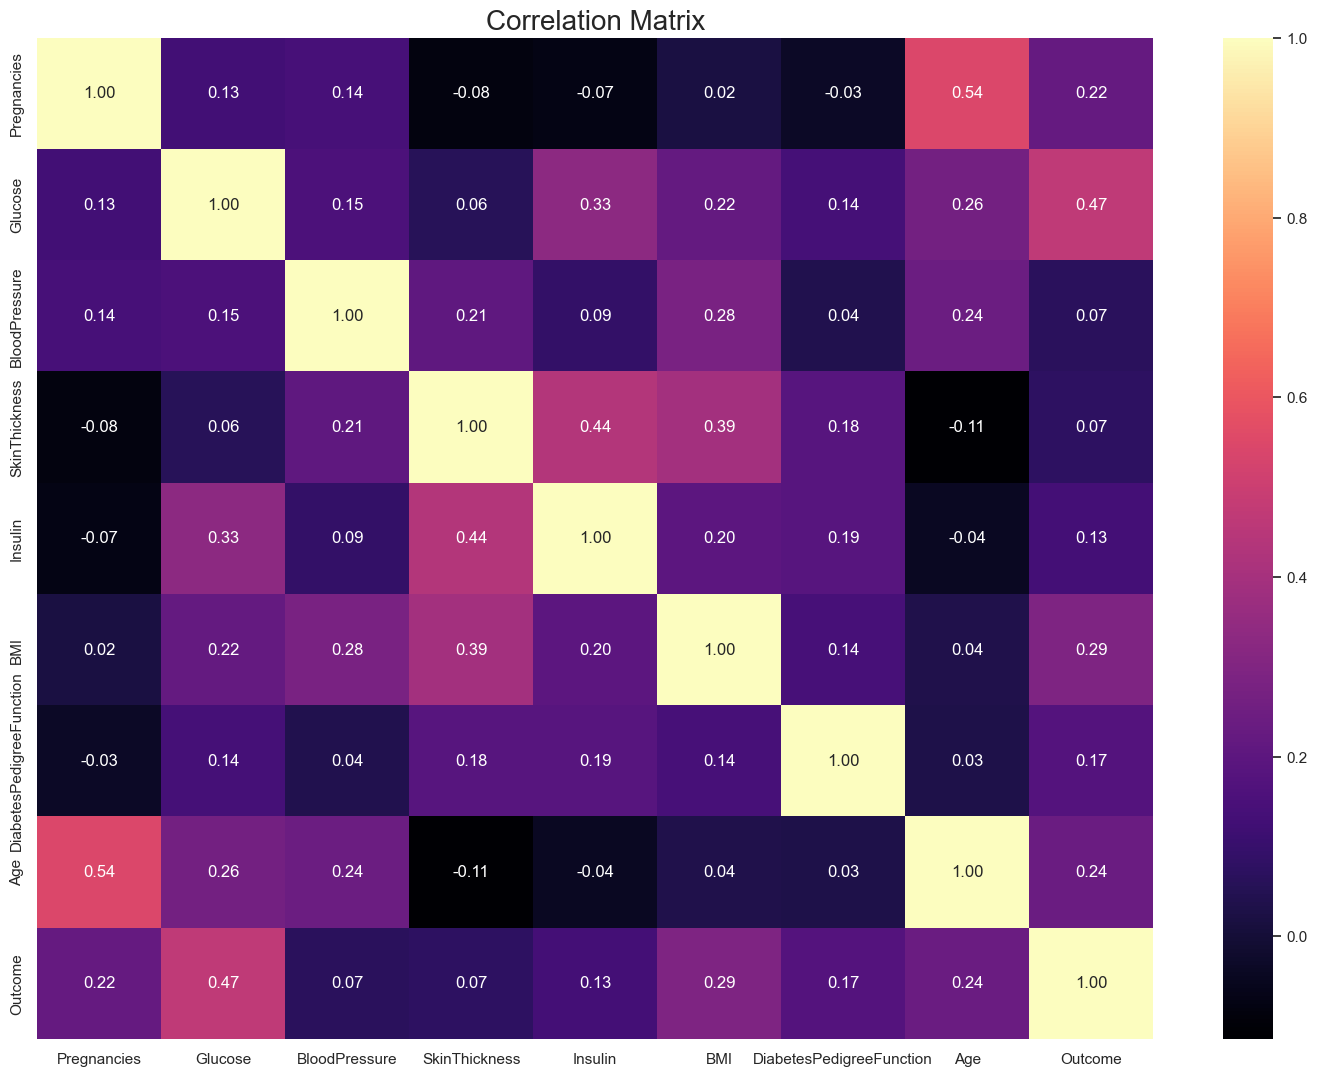

In [182]:
# Korelasyon, olasılık kuramı ve istatistikte iki rassal değişken arasındaki doğrusal ilişkinin yönünü ve gücünü belirtir

df.corr()

# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

 BASE MODEL KURULUMU

In [183]:
y = df["Outcome"]
X = df.drop("Outcome", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [184]:

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}") # basarı oranı
print(f"Recall: {round(recall_score(y_pred,y_test),3)}") # Gercekte diyabet olanların kacına diyabet dedigi
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}") # Recall'in tam tersi. Model tarafından tahmin edilen degerlerin kac tanesi diyabet
print(f"F1: {round(f1_score(y_pred,y_test), 2)}") # Recall ve precision ortalaması
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}") # farklı sınıflandırma esik degerlerine göre basarı


Accuracy: 0.77
Recall: 0.706
Precision: 0.59
F1: 0.64
Auc: 0.75


In [185]:
# Model hangi değişkene daha cok önem varmiş?
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

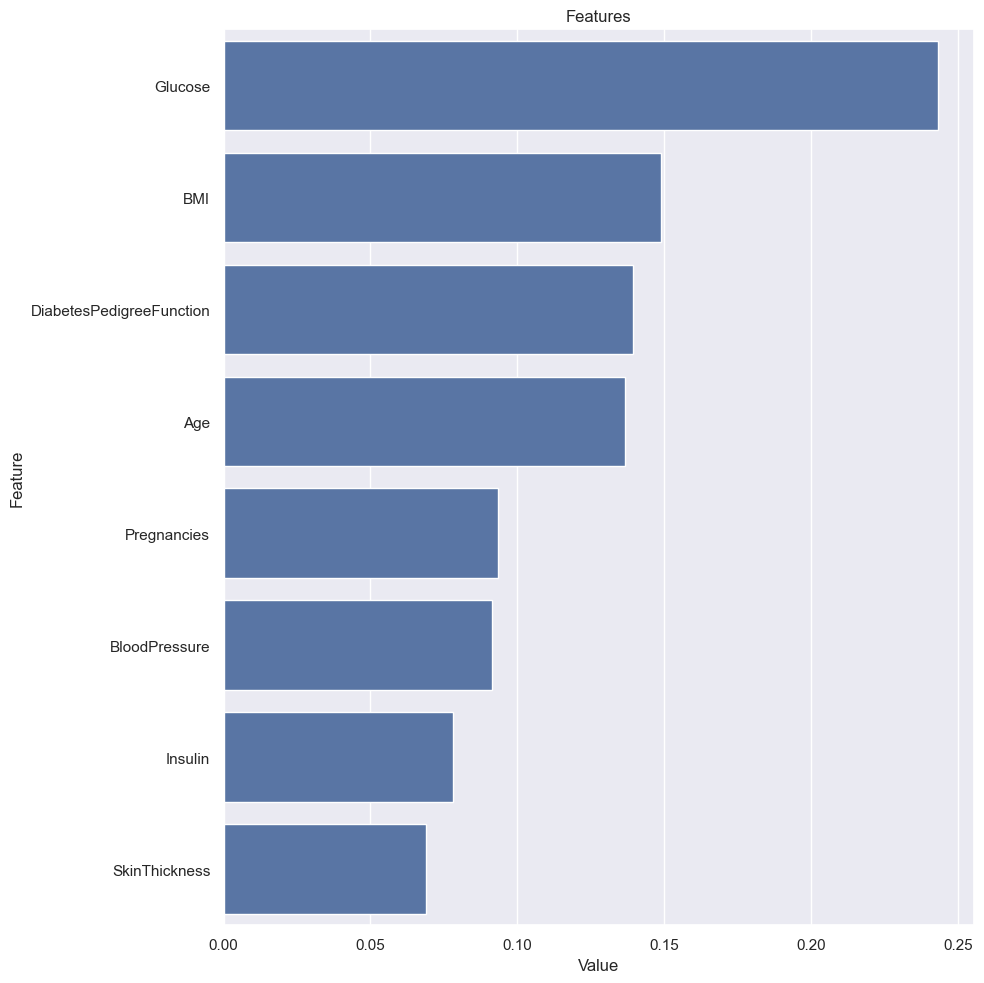

In [186]:
plot_importance(rf_model, X)

## FEATURE ENGINEERING

EKSİK DEĞER ANALİZİ

In [187]:
df.isnull().sum() #eksik değerler yok evet. Ama sıfır olmayacak değişkenlere sıfır atanmıştı

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [188]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
# Bir insanda Pregnancies ve Outcome dışındaki değişken değerleri 0 olamayacağı bilinmektedir.
# Bundan dolayı bu değerlerle ilgili aksiyon kararı alınmalıdır. 0 olan değerlere NaN atanabilir .


In [190]:

# minimum degeri sıfır olamayacak değişkenler yakalanıyor.
# kategorik değişkenler hariç bırakılıyor.
zero_columns = [col for col in df.columns if (df[col].min() == 0 and col not in ["Pregnancies", "Outcome"])]


In [191]:
zero_columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [192]:
# Gözlem birimlerinde 0 olan degiskenlerin her birisine gidip 0 iceren gozlem degerlerini NaN ile değiştirdik.
# where ile eger ki şart saglanıyorsa NAN yazacagım, saglanmıyorsa oldugu gibi yazacagım.
for col in zero_columns:
    df[col] = np.where(df[col] == 0, np.nan, df[col])


In [193]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [194]:
# artık eksik degerleri (NAN) incelebilirz.
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0] # eksik deger varsa na_columns değişkeninde tutulur.
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False) # sıralamanın sebebi ilk olarak fazla eksik degere sahip eğişkenleri görmek istememiz.
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False) # eksik degerlerin tüm değerler içerisindeki oranı
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio']) # kac deger var ve oranını birleştiriyoruz.
    print(missing_df, end="\n")
    if na_name: #na_name true ise degeri döndürür.
        return na_columns


In [195]:

na_columns = missing_values_table(df, na_name=True)

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65


In [196]:
# Eksik Değerlerin Bağımlı Değişken ile İlişkisinin İncelenmesi
# amacımız eksik degerler ile var olan degerlerin karsılastırmasını yapmak olacak.

def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()
    for col in na_columns: # eksik degeri olan değişkenlerde geziyoruz.
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0) # temp_df[col].isnull() degeri true false olarak döndürür. true ise 1: false ise 0 yazar.
        # bu işlemin amacı eksik olan degerlerde var olan degerleri ayrıstırmaktır.
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns # NA barındıran değişkenlerde gezmek istiyorum. yeni değişkene atadım.
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")



In [197]:
missing_vs_target(df, "Outcome", na_columns)
# Eksikse 1 değilse 0.

                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                         0.332717    541
1                         0.387665    227


                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                   0.329949    394
1                   0.368984    374


             TARGET_MEAN  Count
BMI_NA_FLAG                    
0               0.351387    757
1               0.181818     11




In [198]:
# Eksik Değerlerin Doldurulması
for col in zero_columns:
    df.loc[df[col].isnull(), col] = df[col].median()

In [199]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

AYKIRI DEĞER ANALİZİ

In [200]:
# aykırı degerler için limit belirleme
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


In [201]:

# aykırı deger var mı yok mu?
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


In [202]:
# aykırı degerleri baskılama
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


In [203]:
# Aykırı Değer Analizi ve Baskılama İşlemi
for col in df.columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)


Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [204]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


ÖZELLİK ÇIKARIMI

In [205]:
# Yaş değişkenini kategorilere ayırıp yeni yaş değişkeni oluşturulması
df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

In [206]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature


In [207]:
# BMI 18,5 aşağısı underweight, 18.5 ile 24.9 arası normal, 24.9 ile 29.9 arası Overweight ve 30 üstü obez
df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])
#literatur taramasından elde ettigimiz degerler.

In [208]:
# Glukoz degerini kategorik değişkene çevirme
df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [209]:
# Yaş ve beden kitle indeksini bir arada düşünerek kategorik değişken oluşturma 3 kırılım yakalandı
df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"


In [210]:
# Yaş ve Glikoz değerlerini bir arada düşünerek kategorik değişken oluşturma
df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"


In [211]:
# İnsulin Değeri ile Kategorik değişken türetmek
def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return "Normal"
    else:
        return "Abnormal"


In [212]:
df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature,Obese,Normal,obesemature,highmature,Abnormal


In [213]:
df["NEW_GLUCOSE*INSULIN"] = df["Glucose"] * df["Insulin"]

In [214]:
# sıfır olan değerler dikkat!!!!
df["NEW_GLUCOSE*PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [215]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


In [216]:
# Kolonların büyültülmesi
df.columns = [col.upper() for col in df.columns]


In [217]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


ENCODING

In [218]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [219]:
# Değişkenlerin tiplerine göre ayrılması işlemi
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [220]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


In [221]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

['NEW_AGE_CAT', 'NEW_INSULIN_SCORE']

In [222]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,senior,Obese,Prediabetes,obesesenior,highsenior,Normal,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,mature,Overweight,Normal,obesemature,normalmature,Normal,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,mature,Healthy,Prediabetes,obesemature,highmature,Normal,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,mature,Overweight,Normal,obesemature,normalmature,Normal,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,mature,Obese,Normal,obesemature,highmature,Abnormal,23016.0,0.0


In [223]:
for col in binary_cols:
    df = label_encoder(df, col)

In [224]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_BMI,NEW_GLUCOSE,NEW_AGE_BMI_NOM,NEW_AGE_GLUCOSE_NOM,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,Obese,Prediabetes,obesesenior,highsenior,1,18500.0,888.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,Overweight,Normal,obesemature,normalmature,1,10625.0,85.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,Healthy,Prediabetes,obesemature,highmature,1,22875.0,1464.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,Overweight,Normal,obesemature,normalmature,1,8366.0,89.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obese,Normal,obesemature,highmature,0,23016.0,0.0


In [225]:
#One-Hot Encoding İşlemi
# cat_cols listesinin güncelleme işlemi
# target değişkenimi cıkarıyorum.
# bir de binary_cols, zaten daha öncesinde label encoder uygulamıstım.
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]
cat_cols

['NEW_AGE_BMI_NOM', 'NEW_AGE_GLUCOSE_NOM', 'NEW_BMI', 'NEW_GLUCOSE']

In [226]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


In [227]:
df = one_hot_encoder(df, cat_cols, drop_first=True)


In [228]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,1,...,True,False,False,False,False,False,False,True,True,False
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,...,False,False,False,True,False,False,True,False,False,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,...,False,False,False,False,False,True,False,False,True,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,False,False,False,False,False,False,False,True,False,False


STANDARTLAŞTIRMA

In [229]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE*INSULIN',
 'NEW_GLUCOSE*PREGNANCIES']

In [230]:
scaler = StandardScaler() # ortalaması sıfır, standart sapması bir olacak sekilde standardize ediyor.
df[num_cols] = scaler.fit_transform(df[num_cols])


In [231]:
df.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,...,NEW_AGE_GLUCOSE_NOM_highsenior,NEW_AGE_GLUCOSE_NOM_lowmature,NEW_AGE_GLUCOSE_NOM_lowsenior,NEW_AGE_GLUCOSE_NOM_normalmature,NEW_AGE_GLUCOSE_NOM_normalsenior,NEW_BMI_Healthy,NEW_BMI_Overweight,NEW_BMI_Obese,NEW_GLUCOSE_Prediabetes,NEW_GLUCOSE_Diabetes
0,0.639947,0.866045,-0.031990,0.680052,-0.182749,0.166619,0.468492,1.425995,1,1,...,True,False,False,False,False,False,False,True,True,False
1,-0.844885,-1.205066,-0.528319,-0.010867,-0.182749,-0.852200,-0.365061,-0.190672,0,0,...,False,False,False,True,False,False,True,False,False,False
2,1.233880,2.016662,-0.693761,-0.010867,-0.182749,-1.332500,0.604397,-0.105584,1,0,...,False,False,False,False,False,True,False,False,True,False
3,-0.844885,-1.073567,-0.528319,-0.701786,-0.553400,-0.633881,-0.920763,-1.041549,0,0,...,False,False,False,True,False,False,True,False,False,False
4,-1.141852,0.504422,-2.679076,0.680052,0.331380,1.549303,5.484909,-0.020496,1,0,...,False,False,False,False,False,False,False,True,False,False


In [233]:
df.shape

(768, 27)

In [234]:
df.describe()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,NEW_AGE_CAT,NEW_INSULIN_SCORE,NEW_GLUCOSE*INSULIN,NEW_GLUCOSE*PREGNANCIES
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,5.782412e-18,1.989150e-16,-1.306825e-16,2.613650e-16,2.451743e-16,1.931325e-16,0.348958,0.115885,0.825521,-1.040834e-16,5.551115e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951,0.320296,0.379768,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.544237e+00,-1.509918e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00,0.000000,0.000000,0.000000,-1.145116e+00,-1.041698e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.714796e-01,-2.245965e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01,0.000000,0.000000,1.000000,-4.776420e-01,-7.882629e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.086683e-02,-1.827489e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01,0.000000,0.000000,1.000000,-2.351977e-01,-3.063040e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.345927e-01,-1.558468e-01,6.032562e-01,4.662269e-01,6.602056e-01,1.000000,0.000000,1.000000,1.159286e-01,5.184415e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,6.837869e+00,6.184076e+00,5.042397e+00,5.883565e+00,4.063716e+00,1.000000,1.000000,1.000000,7.449619e+00,4.960587e+00


MODELLEME

In [236]:
# Feature Engineering ardından model basarısını degerlendirelim.
y = df["OUTCOME"]
X = df.drop("OUTCOME", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)


In [237]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [238]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.711
Precision: 0.67
F1: 0.69
Auc: 0.77


FEATURE IMPORTANCE

In [239]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False))
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

       Value                            Feature
1   0.138218                            GLUCOSE
10  0.131261                NEW_GLUCOSE*INSULIN
5   0.099407                                BMI
11  0.097960            NEW_GLUCOSE*PREGNANCIES
7   0.096865                                AGE
6   0.093777           DIABETESPEDIGREEFUNCTION
2   0.059068                      BLOODPRESSURE
0   0.051366                        PREGNANCIES
4   0.050708                            INSULIN
24  0.050068            NEW_GLUCOSE_Prediabetes
3   0.046194                      SKINTHICKNESS
19  0.017336   NEW_AGE_GLUCOSE_NOM_normalmature
15  0.014442     NEW_AGE_GLUCOSE_NOM_highmature
23  0.014142                      NEW_BMI_Obese
21  0.009721                    NEW_BMI_Healthy
22  0.007625                 NEW_BMI_Overweight
9   0.006457                  NEW_INSULIN_SCORE
8   0.005017                        NEW_AGE_CAT
12  0.004690        NEW_AGE_BMI_NOM_obesesenior
16  0.002448     NEW_AGE_GLUCOSE_NOM_hig

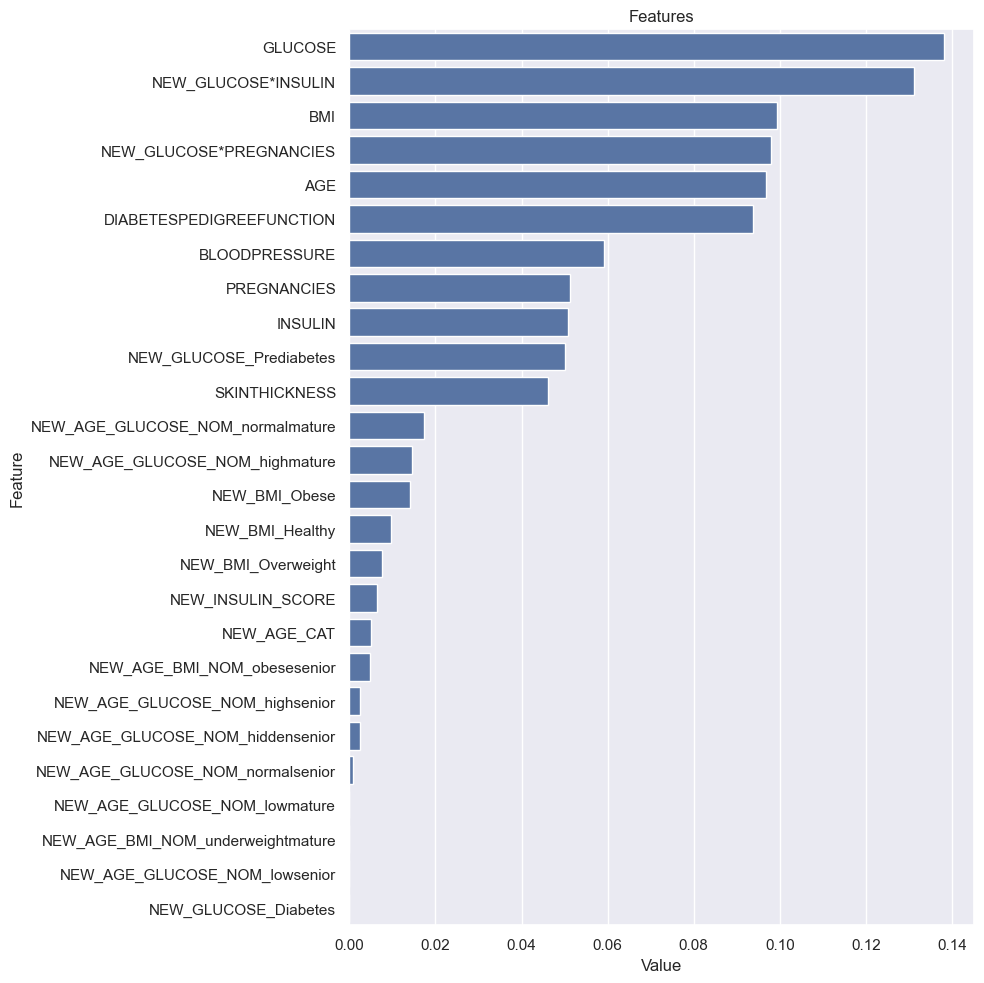

In [240]:
plot_importance(rf_model, X)